In [ ]:
# preprocessing.ipynb

import os
import subprocess
import re
import logging
from tqdm import tqdm  # For progress bar

# Define paths
dataset_dir = "/Users/prithvichoudhary/Desktop/practice RA Work/data"
t1_dir = os.path.join(dataset_dir, "t1_pd")
ppmi_dir = os.path.join(t1_dir, "PPMI")
output_dir = os.path.join(dataset_dir, "yes")

# Create output directory if it doesn't exist
os.makedirs(output_dir, exist_ok=True)

# Configure logging
logging.basicConfig(
    filename=os.path.join(dataset_dir, 'preprocessing.log'),
    filemode='a',
    format='%(asctime)s - %(levelname)s - %(message)s',
    level=logging.INFO
)

def get_patient_folders(ppmi_directory, required_dicom_count=16):
    """
    Traverse the PPMI directory and return a list of patient folders
    whose names start with 'I' followed by exactly 7 digits and contain
    a specific number of DICOM files.

    Parameters:
    - ppmi_directory (str): Path to the PPMI directory.
    - required_dicom_count (int): Number of DICOM files expected per patient.

    Returns:
    - list of tuples: List of tuples (patient_name, patient_folder_path)
    """
    patient_folders = []
    pattern = re.compile(r'^I\d{7}$')  # Pattern to match 'I' followed by 7 digits

    for root, dirs, files in os.walk(ppmi_directory):
        # Get the last part of the current path
        current_folder = os.path.basename(root)
        if pattern.match(current_folder):
            # Check if the folder contains exactly required_dicom_count DICOM files
            dcm_files = [f for f in files if f.lower().endswith('.dcm')]
            if len(dcm_files) == required_dicom_count:
                patient_name = current_folder
                patient_folders.append((patient_name, root))
            else:
                logging.warning(f"Folder {root} skipped: Expected {required_dicom_count} DICOM files, found {len(dcm_files)}.")

    return patient_folders

def dicom_to_nifti_dcm2niix(dcm_directory, output_nifti_path):
    """
    Convert DICOM files to NIfTI using dcm2niix.

    Parameters:
    - dcm_directory (str): Directory containing DICOM files.
    - output_nifti_path (str): Path to save the converted NIfTI file (.nii.gz).

    Returns:
    - bool: True if conversion was successful, False otherwise.
    """
    try:
        # dcm2niix command:
        # -z y : compress output to .nii.gz
        # -o : output directory
        # -f : output filename (without extension)
        command = [
            'dcm2niix',
            '-z', 'y',
            '-o', os.path.dirname(output_nifti_path),
            '-f', os.path.basename(output_nifti_path).replace('.nii.gz', ''),
            dcm_directory
        ]
        logging.info(f"Executing dcm2niix command: {' '.join(command)}")

        # Execute the command
        result = subprocess.run(
            command,
            check=True,
            stdout=subprocess.PIPE,
            stderr=subprocess.PIPE,
            text=True
        )
        logging.info(f"Successfully converted DICOM to NIfTI for folder {dcm_directory}.")
        logging.debug(f"dcm2niix output:\n{result.stdout}\n{result.stderr}")
        return True
    except subprocess.CalledProcessError as e:
        logging.error(f"dcm2niix failed for {dcm_directory}: {e.stderr.strip()}")
        return False
    except Exception as e:
        logging.error(f"Unexpected error during DICOM to NIfTI conversion for {dcm_directory}: {e}")
        return False

def main():
    # Get all patient folders
    patient_folders = get_patient_folders(ppmi_dir)
    num_patients = len(patient_folders)
    logging.info(f"Found {num_patients} patient folders with 16 DICOM files each.")
    print(f"Found {num_patients} patient folders with 16 DICOM files each.")

    if num_patients == 0:
        logging.error("No patient folders found. Exiting the pipeline.")
        print("No patient folders found. Exiting the pipeline.")
        return

    # Process Each Patient
    for patient_name, patient_folder in tqdm(patient_folders, desc="Processing Patients"):
        try:
            # Define path for the output NIfTI file
            output_nifti_path = os.path.join(output_dir, f"{patient_name}.nii.gz")

            # Convert DICOM to NIfTI
            conversion_success = dicom_to_nifti_dcm2niix(patient_folder, output_nifti_path)
            if not conversion_success:
                logging.error(f"DICOM to NIfTI conversion failed for {patient_name}.")
                continue  # Skip to the next patient

            logging.info(f"Successfully processed {patient_name}.")

        except Exception as e:
            logging.error(f"An unexpected error occurred for patient folder {patient_folder}: {e}")

    logging.info("Processing completed.")
    print("Processing completed.")

if __name__ == "__main__":
    main()


In [ ]:
# preprocessing.ipynb

import os
import subprocess
import re
import logging
from tqdm import tqdm  # For progress bar

# Define paths
dataset_dir = "/Users/prithvichoudhary/Desktop/practice RA Work/data"
t1_dir = os.path.join(dataset_dir, "t1")
ppmi_dir = os.path.join(t1_dir, "PPMI")
output_dir = os.path.join(dataset_dir, "no")

# Create output directory if it doesn't exist
os.makedirs(output_dir, exist_ok=True)

# Configure logging
logging.basicConfig(
    filename=os.path.join(dataset_dir, 'preprocessing.log'),
    filemode='a',
    format='%(asctime)s - %(levelname)s - %(message)s',
    level=logging.INFO
)

def get_patient_folders(ppmi_directory, required_dicom_count=16):
    """
    Traverse the PPMI directory and return a list of patient folders
    whose names start with 'I' followed by exactly 7 digits and contain
    a specific number of DICOM files.

    Parameters:
    - ppmi_directory (str): Path to the PPMI directory.
    - required_dicom_count (int): Number of DICOM files expected per patient.

    Returns:
    - list of tuples: List of tuples (patient_name, patient_folder_path)
    """
    patient_folders = []
    pattern = re.compile(r'^I\d{7}$')  # Pattern to match 'I' followed by 7 digits

    for root, dirs, files in os.walk(ppmi_directory):
        # Get the last part of the current path
        current_folder = os.path.basename(root)
        if pattern.match(current_folder):
            # Check if the folder contains exactly required_dicom_count DICOM files
            dcm_files = [f for f in files if f.lower().endswith('.dcm')]
            if len(dcm_files) == required_dicom_count:
                patient_name = current_folder
                patient_folders.append((patient_name, root))
            else:
                logging.warning(f"Folder {root} skipped: Expected {required_dicom_count} DICOM files, found {len(dcm_files)}.")

    return patient_folders

def dicom_to_nifti_dcm2niix(dcm_directory, output_nifti_path):
    """
    Convert DICOM files to NIfTI using dcm2niix.

    Parameters:
    - dcm_directory (str): Directory containing DICOM files.
    - output_nifti_path (str): Path to save the converted NIfTI file (.nii.gz).

    Returns:
    - bool: True if conversion was successful, False otherwise.
    """
    try:
        # dcm2niix command:
        # -z y : compress output to .nii.gz
        # -o : output directory
        # -f : output filename (without extension)
        command = [
            'dcm2niix',
            '-z', 'y',
            '-o', os.path.dirname(output_nifti_path),
            '-f', os.path.basename(output_nifti_path).replace('.nii.gz', ''),
            dcm_directory
        ]
        logging.info(f"Executing dcm2niix command: {' '.join(command)}")

        # Execute the command
        result = subprocess.run(
            command,
            check=True,
            stdout=subprocess.PIPE,
            stderr=subprocess.PIPE,
            text=True
        )
        logging.info(f"Successfully converted DICOM to NIfTI for folder {dcm_directory}.")
        logging.debug(f"dcm2niix output:\n{result.stdout}\n{result.stderr}")
        return True
    except subprocess.CalledProcessError as e:
        logging.error(f"dcm2niix failed for {dcm_directory}: {e.stderr.strip()}")
        return False
    except Exception as e:
        logging.error(f"Unexpected error during DICOM to NIfTI conversion for {dcm_directory}: {e}")
        return False

def main():
    # Get all patient folders
    patient_folders = get_patient_folders(ppmi_dir)
    num_patients = len(patient_folders)
    logging.info(f"Found {num_patients} patient folders with 16 DICOM files each.")
    print(f"Found {num_patients} patient folders with 16 DICOM files each.")

    if num_patients == 0:
        logging.error("No patient folders found. Exiting the pipeline.")
        print("No patient folders found. Exiting the pipeline.")
        return

    # Process Each Patient
    for patient_name, patient_folder in tqdm(patient_folders, desc="Processing Patients"):
        try:
            # Define path for the output NIfTI file
            output_nifti_path = os.path.join(output_dir, f"{patient_name}.nii.gz")

            # Convert DICOM to NIfTI
            conversion_success = dicom_to_nifti_dcm2niix(patient_folder, output_nifti_path)
            if not conversion_success:
                logging.error(f"DICOM to NIfTI conversion failed for {patient_name}.")
                continue  # Skip to the next patient

            logging.info(f"Successfully processed {patient_name}.")

        except Exception as e:
            logging.error(f"An unexpected error occurred for patient folder {patient_folder}: {e}")

    logging.info("Processing completed.")
    print("Processing completed.")

if __name__ == "__main__":
    main()


Processing /Users/prithvichoudhary/Desktop/practice RA Work/data/yes/I1575239.nii.gz...
Saved corrected image to /Users/prithvichoudhary/Desktop/practice RA Work/data/yes_bias_normalised/I1575239.nii.gz
Processing /Users/prithvichoudhary/Desktop/practice RA Work/data/yes/I1702920.nii.gz...
Saved corrected image to /Users/prithvichoudhary/Desktop/practice RA Work/data/yes_bias_normalised/I1702920.nii.gz
Processing /Users/prithvichoudhary/Desktop/practice RA Work/data/yes/I1561348.nii.gz...
Saved corrected image to /Users/prithvichoudhary/Desktop/practice RA Work/data/yes_bias_normalised/I1561348.nii.gz
Processing /Users/prithvichoudhary/Desktop/practice RA Work/data/yes/I1495874.nii.gz...
Saved corrected image to /Users/prithvichoudhary/Desktop/practice RA Work/data/yes_bias_normalised/I1495874.nii.gz
Processing /Users/prithvichoudhary/Desktop/practice RA Work/data/yes/I1530032.nii.gz...
Saved corrected image to /Users/prithvichoudhary/Desktop/practice RA Work/data/yes_bias_normalised/I

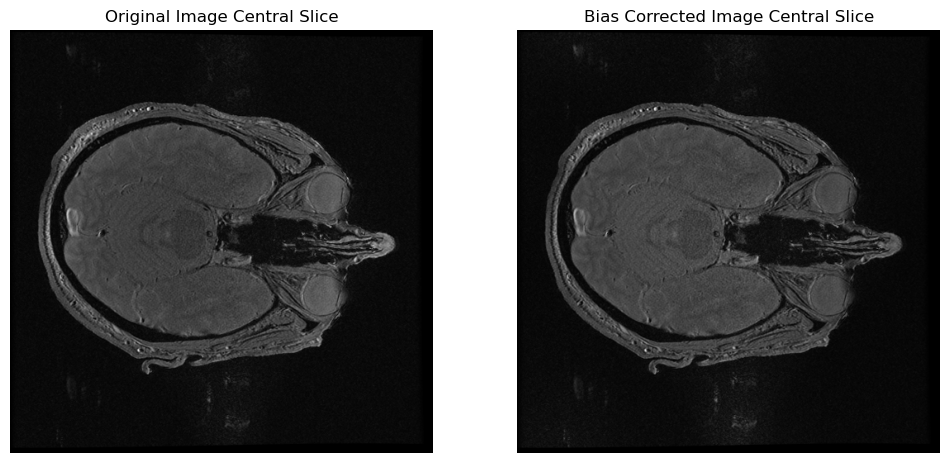

In [4]:
# bias_correction_and_visualization.ipynb

import os
import SimpleITK as sitk
import matplotlib.pyplot as plt
import numpy as np

# Define paths
dataset_dir = "/Users/prithvichoudhary/Desktop/practice RA Work/data"
yes_dir = os.path.join(dataset_dir, "yes")
no_dir = os.path.join(dataset_dir, "no")
yes_bias_normalised_dir = os.path.join(dataset_dir, "yes_bias_normalised")
no_bias_normalised_dir = os.path.join(dataset_dir, "no_bias_normalised")

# Create output directories if they don't exist
os.makedirs(yes_bias_normalised_dir, exist_ok=True)
os.makedirs(no_bias_normalised_dir, exist_ok=True)

def bias_correction(input_dir, output_dir):
    """
    Performs N4 bias field correction on all NIfTI files in the input directory
    and saves the corrected images to the output directory.
    
    Parameters:
    - input_dir (str): Path to the directory containing input NIfTI files.
    - output_dir (str): Path to the directory to save corrected NIfTI files.
    """
    # Get list of NIfTI files in the input directory
    files = [f for f in os.listdir(input_dir) if f.endswith('.nii') or f.endswith('.nii.gz')]
    for file in files:
        # Full path to the input and output files
        input_path = os.path.join(input_dir, file)
        output_path = os.path.join(output_dir, file)
        
        # Read the image
        image = sitk.ReadImage(input_path)
        
        # **Cast the image to a supported pixel type (float)**
        image = sitk.Cast(image, sitk.sitkFloat32)
        
        # Perform bias field correction using N4BiasFieldCorrectionImageFilter
        print(f"Processing {input_path}...")
        
        # Create a mask using Otsu's method
        mask_image = sitk.OtsuThreshold(image, 0, 1, 200)
        
        # Initialize the bias field correction filter
        corrector = sitk.N4BiasFieldCorrectionImageFilter()
        
        # **Set the maximum number of iterations (optional)**
        # corrector.SetMaximumNumberOfIterations([50, 50, 50, 50])  # You can adjust this as needed
        
        # Execute the bias correction
        corrected_image = corrector.Execute(image, mask_image)
        
        # Save the corrected image
        sitk.WriteImage(corrected_image, output_path)
        print(f"Saved corrected image to {output_path}")

# Apply bias correction to 'yes' and 'no' folders
bias_correction(yes_dir, yes_bias_normalised_dir)
bias_correction(no_dir, no_bias_normalised_dir)

# Display the central slice of the first patient before and after bias correction

# Get list of NIfTI files in 'yes' folder
yes_files = [f for f in os.listdir(yes_dir) if f.endswith('.nii') or f.endswith('.nii.gz')]
if not yes_files:
    print("No NIfTI files found in the 'yes' folder.")
else:
    # Get the first file
    first_file = yes_files[0]

    # Paths to the original and corrected images
    original_image_path = os.path.join(yes_dir, first_file)
    corrected_image_path = os.path.join(yes_bias_normalised_dir, first_file)

    # Read images
    original_image = sitk.ReadImage(original_image_path)
    corrected_image = sitk.ReadImage(corrected_image_path)

    # **Convert images to float for consistent visualization**
    original_image = sitk.Cast(original_image, sitk.sitkFloat32)
    corrected_image = sitk.Cast(corrected_image, sitk.sitkFloat32)

    # Convert images to numpy arrays
    original_array = sitk.GetArrayFromImage(original_image)
    corrected_array = sitk.GetArrayFromImage(corrected_image)

    # Get the central slice index (assuming axial slices)
    central_slice_index = original_array.shape[0] // 2
    original_slice = original_array[central_slice_index, :, :]
    corrected_slice = corrected_array[central_slice_index, :, :]

    # Display the slices side by side
    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    plt.imshow(np.rot90(original_slice), cmap='gray')
    plt.title('Original Image Central Slice')
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(np.rot90(corrected_slice), cmap='gray')
    plt.title('Bias Corrected Image Central Slice')
    plt.axis('off')

    plt.show()


In [5]:
#dataset_dir
#├── yes/                    # Original 'yes' cases
#├── no/                     # Original 'no' cases
#├── yes_bias_normalised/    # Corrected 'yes' cases
#└── no_bias_normalised/     # Corrected 'no' cases


In [13]:
#Image Processing Steps
#Images are converted to 32-bit float format
#Otsu thresholding creates a binary mask
#N4BiasFieldCorrectionImageFilter removes intensity non-uniformity
#Results are saved in the corresponding output directories

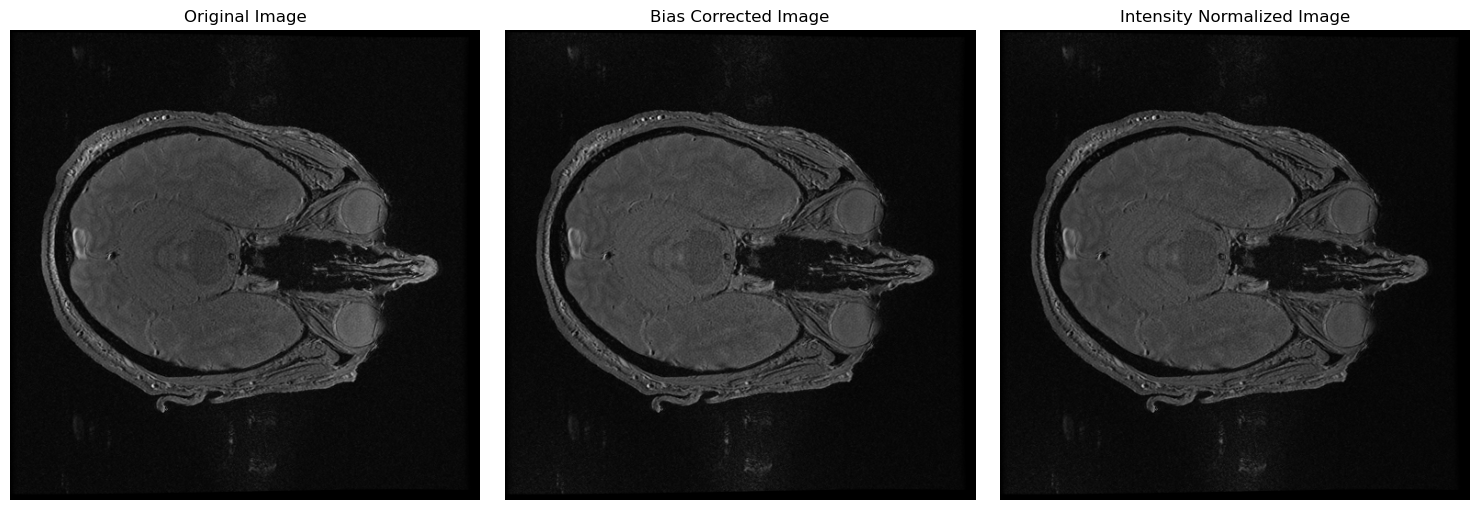

Saved intensity normalized image to: /Users/prithvichoudhary/Desktop/practice RA Work/data/yes_bias_normalised/intensity_normalised_I1575239.nii.gz


In [14]:
import os
import SimpleITK as sitk
import matplotlib.pyplot as plt
import numpy as np

# Define directories
yes_dir = "/Users/prithvichoudhary/Desktop/practice RA Work/data/yes"
yes_bias_normalised_dir = "/Users/prithvichoudhary/Desktop/practice RA Work/data/yes_bias_normalised"

# Get first file from yes_bias_normalised directory
bias_normalised_files = [f for f in os.listdir(yes_bias_normalised_dir) if f.endswith('.nii') or f.endswith('.nii.gz')]

if not bias_normalised_files:
    print("No files found in the bias normalised folder.")
else:
    first_file = bias_normalised_files[0]
    
    # Define paths for all three images
    original_path = os.path.join(yes_dir, first_file)
    bias_normalised_path = os.path.join(yes_bias_normalised_dir, first_file)
    
    # Read all three images
    original_image = sitk.ReadImage(original_path)
    bias_normalised_image = sitk.ReadImage(bias_normalised_path)
    
    # Convert bias normalised image to array for intensity normalization
    bias_normalised_array = sitk.GetArrayFromImage(bias_normalised_image)
    
    # Perform intensity normalization to [0, 1]
    intensity_normalised_array = (bias_normalised_array - np.min(bias_normalised_array)) / (
        np.max(bias_normalised_array) - np.min(bias_normalised_array))
    
    # Convert arrays for visualization
    original_array = sitk.GetArrayFromImage(original_image)
    
    # Get central slice for all three images
    central_slice = original_array.shape[0] // 2
    original_slice = original_array[central_slice, :, :]
    bias_slice = bias_normalised_array[central_slice, :, :]
    intensity_slice = intensity_normalised_array[central_slice, :, :]
    
    # Display all three slices
    plt.figure(figsize=(15, 5))
    
    plt.subplot(1, 3, 1)
    plt.imshow(np.rot90(original_slice), cmap='gray')
    plt.title('Original Image')
    plt.axis('off')
    
    plt.subplot(1, 3, 2)
    plt.imshow(np.rot90(bias_slice), cmap='gray')
    plt.title('Bias Corrected Image')
    plt.axis('off')
    
    plt.subplot(1, 3, 3)
    plt.imshow(np.rot90(intensity_slice), cmap='gray', vmin=0, vmax=1)
    plt.title('Intensity Normalized Image')
    plt.axis('off')
    
    plt.tight_layout()
    plt.show()
    
    # Save the intensity normalized image
    intensity_normalised_image = sitk.GetImageFromArray(intensity_normalised_array)
    intensity_normalised_image.CopyInformation(bias_normalised_image)
    output_path = os.path.join(yes_bias_normalised_dir, 'intensity_normalised_' + first_file)
    sitk.WriteImage(intensity_normalised_image, output_path)
    print(f"Saved intensity normalized image to: {output_path}")




Image Statistics:

Original Image:
min: 0.000000
max: 7064.000000
mean: 666.265384
std: 665.355637
median: 292.000000
skewness: 1.158150
kurtosis: 0.486066

Bias Corrected Image:
min: 0.000000
max: 5464.854492
mean: 601.353577
std: 586.689819
median: 268.959900
skewness: 0.968801
kurtosis: -0.322818

Intensity Normalized Image:
min: 0.000000
max: 1.000000
mean: 0.110040
std: 0.107357
median: 0.049216
skewness: 0.968802
kurtosis: -0.322814

Saved intensity normalized image to: /Users/prithvichoudhary/Desktop/practice RA Work/data/yes_bias_normalised/intensity_normalised_I1575239.nii.gz


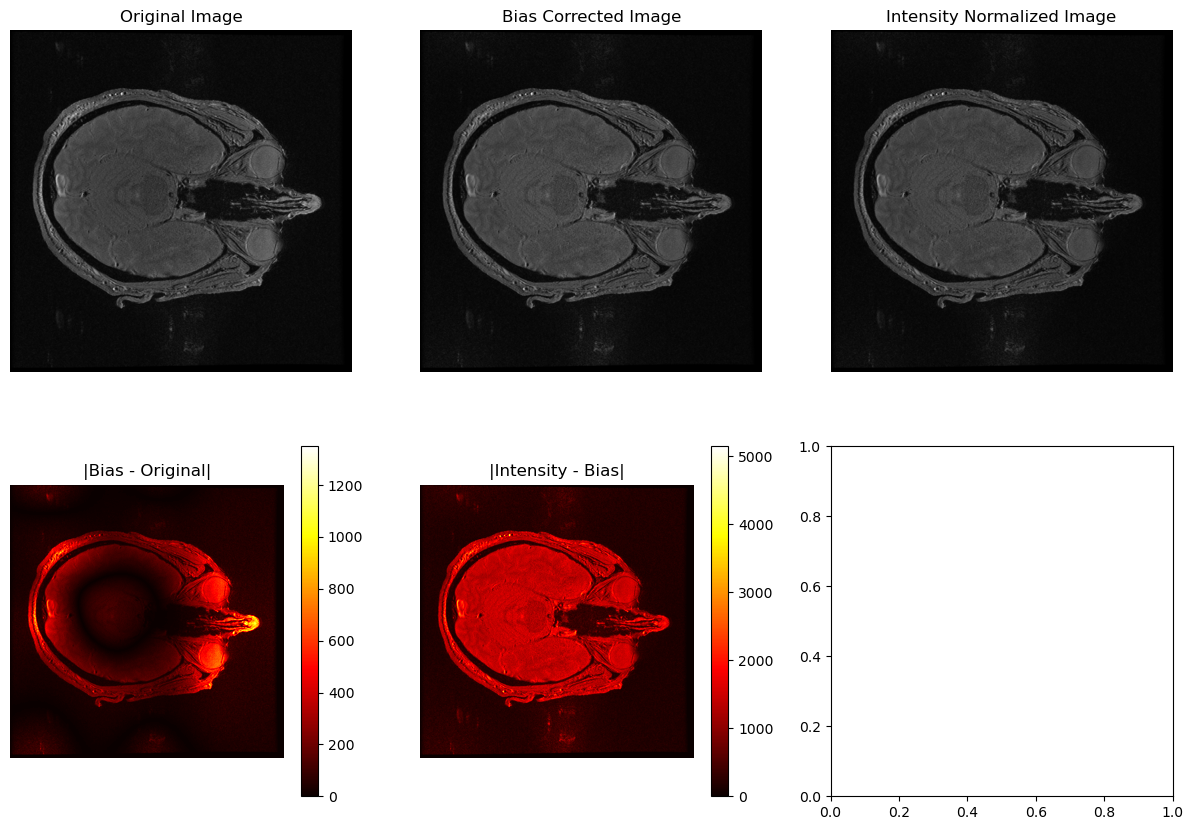

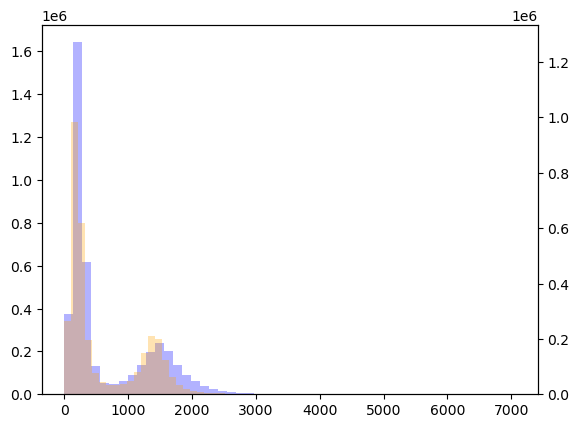

In [12]:
import os
import SimpleITK as sitk
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

# Define directories
yes_dir = "/Users/prithvichoudhary/Desktop/practice RA Work/data/yes"
yes_bias_normalised_dir = "/Users/prithvichoudhary/Desktop/practice RA Work/data/yes_bias_normalised"

# Get first file from yes_bias_normalised directory
bias_normalised_files = [f for f in os.listdir(yes_bias_normalised_dir) if f.endswith('.nii') or f.endswith('.nii.gz')]

if not bias_normalised_files:
    print("No files found in the bias normalised folder.")
else:
    first_file = bias_normalised_files[0]
    
    # Define paths and read images
    original_path = os.path.join(yes_dir, first_file)
    bias_normalised_path = os.path.join(yes_bias_normalised_dir, first_file)
    
    original_image = sitk.ReadImage(original_path)
    bias_normalised_image = sitk.ReadImage(bias_normalised_path)
    
    # Convert to arrays
    original_array = sitk.GetArrayFromImage(original_image)
    bias_normalised_array = sitk.GetArrayFromImage(bias_normalised_image)
    
    # Perform intensity normalization
    intensity_normalised_array = (bias_normalised_array - np.min(bias_normalised_array)) / (
        np.max(bias_normalised_array) - np.min(bias_normalised_array))
    
    # Calculate statistics for each image
    def calculate_statistics(array):
        return {
            'min': np.min(array),
            'max': np.max(array),
            'mean': np.mean(array),
            'std': np.std(array),
            'median': np.median(array),
            'skewness': stats.skew(array.flatten()),
            'kurtosis': stats.kurtosis(array.flatten())
        }
    
    original_stats = calculate_statistics(original_array)
    bias_stats = calculate_statistics(bias_normalised_array)
    intensity_stats = calculate_statistics(intensity_normalised_array)
    
    # Print statistics
    print("\nImage Statistics:")
    print("\nOriginal Image:")
    for key, value in original_stats.items():
        print(f"{key}: {value:.6f}")
    
    print("\nBias Corrected Image:")
    for key, value in bias_stats.items():
        print(f"{key}: {value:.6f}")
    
    print("\nIntensity Normalized Image:")
    for key, value in intensity_stats.items():
        print(f"{key}: {value:.6f}")
    
    # Get central slices
    central_slice = original_array.shape[0] // 2
    original_slice = original_array[central_slice, :, :]
    bias_slice = bias_normalised_array[central_slice, :, :]
    intensity_slice = intensity_normalised_array[central_slice, :, :]
    
    # Create difference images
    diff_bias_original = np.abs(bias_slice - original_slice)
    diff_intensity_bias = np.abs(intensity_slice - bias_slice)
    
    # Plotting
    plt.figure(figsize=(15, 10))
    
    # Original images
    plt.subplot(2, 3, 1)
    plt.imshow(np.rot90(original_slice), cmap='gray')
    plt.title('Original Image')
    plt.axis('off')
    
    plt.subplot(2, 3, 2)
    plt.imshow(np.rot90(bias_slice), cmap='gray')
    plt.title('Bias Corrected Image')
    plt.axis('off')
    
    plt.subplot(2, 3, 3)
    plt.imshow(np.rot90(intensity_slice), cmap='gray', vmin=0, vmax=1)
    plt.title('Intensity Normalized Image')
    plt.axis('off')
    
    # Difference images
    plt.subplot(2, 3, 4)
    plt.imshow(np.rot90(diff_bias_original), cmap='hot')
    plt.title('|Bias - Original|')
    plt.colorbar()
    plt.axis('off')
    
    plt.subplot(2, 3, 5)
    plt.imshow(np.rot90(diff_intensity_bias), cmap='hot')
    plt.title('|Intensity - Bias|')
    plt.colorbar()
    plt.axis('off')
    
    # Histogram
    # Option 1: Plot on separate y-axes
    plt.subplot(2, 3, 6)
    fig, ax1 = plt.subplots()
    ax2 = ax1.twinx()
    
    ax1.hist(original_array.flatten(), bins=50, alpha=0.3, label='Original', color='blue')
    ax1.hist(bias_normalised_array.flatten(), bins=50, alpha=0.3, label='Bias Corrected', color='orange')
    ax2.hist(intensity_normalised_array.flatten(), bins=50, alpha=0.3, label='Intensity Normalized', color='green')
    
    # Option 2: Normalize all arrays to 0-1 range before plotting
    original_norm = (original_array - np.min(original_array)) / (np.max(original_array) - np.min(original_array))
    bias_norm = (bias_normalised_array - np.min(bias_normalised_array)) / (np.max(bias_normalised_array) - np.min(bias_normalised_array))
    
    plt.hist(original_norm.flatten(), bins=50, alpha=0.3, label='Original', density=True)
    plt.hist(bias_norm.flatten(), bins=50, alpha=0.3, label='Bias Corrected', density=True)
    plt.hist(intensity_normalised_array.flatten(), bins=50, alpha=0.3, label='Intensity Normalized', density=True)

    
    # Save the intensity normalized image
    intensity_normalised_image = sitk.GetImageFromArray(intensity_normalised_array)
    intensity_normalised_image.CopyInformation(bias_normalised_image)
    output_path = os.path.join(yes_bias_normalised_dir, 'intensity_normalised_' + first_file)
    sitk.WriteImage(intensity_normalised_image, output_path)
    print(f"\nSaved intensity normalized image to: {output_path}")


In [ ]:
#The similarity in appearance actually suggests that both normalizations are working as intended, maintaining the important tissue contrasts while standardizing the image intensities.

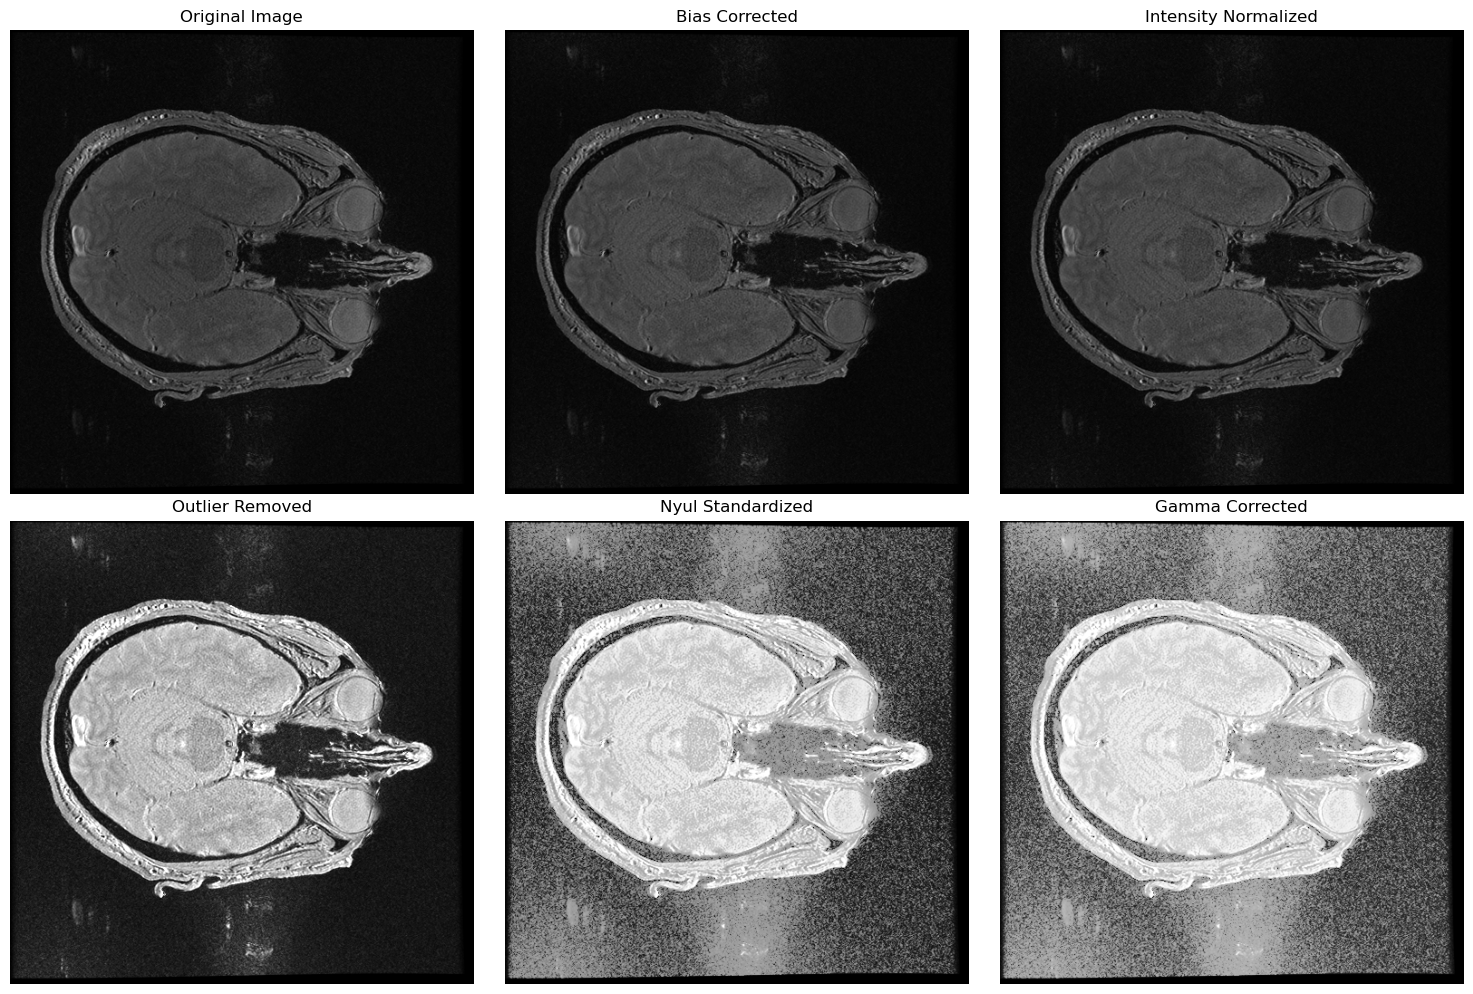

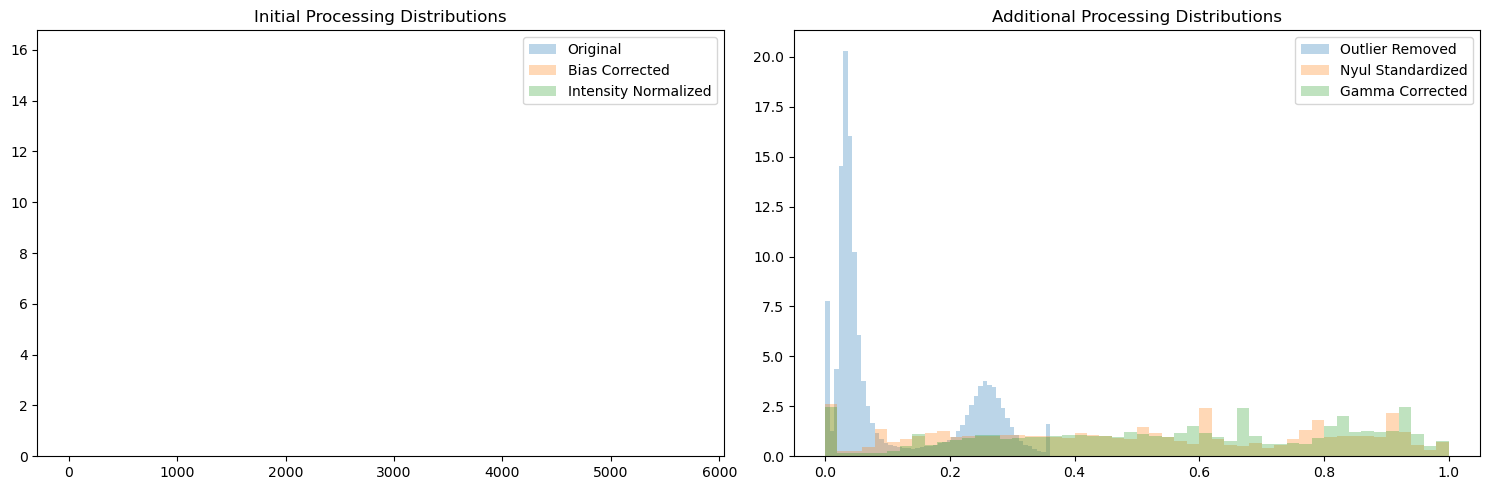


Image Statistics (Central Slice):

Original:
Range: [0.000000, 5752.000000]
Mean: 673.401081
Std: 672.299016
Median: 280.000000
Skewness: 1.072479
Kurtosis: 0.132529

Bias Corrected:
Range: [0.000000, 5145.979004]
Mean: 598.861328
Std: 590.701172
Median: 252.972351
Skewness: 0.917371
Kurtosis: -0.537932

Intensity Normalized:
Range: [0.000000, 0.941650]
Mean: 0.109584
Std: 0.108091
Median: 0.046291
Skewness: 0.917371
Kurtosis: -0.537933

Outlier Removed:
Range: [0.000000, 0.360847]
Mean: 0.109035
Std: 0.106508
Median: 0.046291
Skewness: 0.838570
Kurtosis: -0.949606

Nyul Standardized:
Range: [0.000000, 1.000000]
Mean: 0.496248
Std: 0.288265
Median: 0.500000
Skewness: -0.021479
Kurtosis: -1.181937

Gamma Corrected:
Range: [0.000000, 1.000000]
Mean: 0.550949
Std: 0.278250
Median: 0.574349
Skewness: -0.248486
Kurtosis: -0.989399


In [18]:
import os
import SimpleITK as sitk
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats as scipy_stats

def calculate_statistics(image_array):
    """Calculate statistical measures for an image array"""
    flattened = image_array.flatten()
    return {
        'min': np.min(flattened),
        'max': np.max(flattened),
        'mean': np.mean(flattened),
        'std': np.std(flattened),
        'median': np.median(flattened),
        'skewness': scipy_stats.skew(flattened),
        'kurtosis': scipy_stats.kurtosis(flattened)
    }

def normalize_to_positive(image_array):
    """Shift intensities to positive range"""
    return image_array - np.min(image_array)

def remove_outliers(image_array, lower_percentile=1, upper_percentile=99):
    """Remove intensity outliers using percentile-based cutoff"""
    lower = np.percentile(image_array, lower_percentile)
    upper = np.percentile(image_array, upper_percentile)
    return np.clip(image_array, lower, upper)

def nyul_standardization(image_array, landmarks_percentiles=[1, 10, 20, 30, 40, 50, 60, 70, 80, 90, 99]):
    """Simple version of Nyul standardization"""
    landmarks = np.percentile(image_array, landmarks_percentiles)
    standard_scale = np.linspace(0, 1, len(landmarks))
    return np.interp(image_array, landmarks, standard_scale)

def gamma_correction(image_array, gamma=0.8):
    """Apply gamma correction"""
    image_norm = (image_array - np.min(image_array)) / (np.max(image_array) - np.min(image_array))
    return np.power(image_norm, gamma)

# Define directories
yes_dir = "/Users/prithvichoudhary/Desktop/practice RA Work/data/yes"
yes_bias_normalised_dir = "/Users/prithvichoudhary/Desktop/practice RA Work/data/yes_bias_normalised"

# Get files
intensity_file = 'intensity_normalised_I1575239.nii.gz'
original_file = 'I1575239.nii.gz'

# Read images
original_image = sitk.ReadImage(os.path.join(yes_dir, original_file))
bias_image = sitk.ReadImage(os.path.join(yes_bias_normalised_dir, original_file))
intensity_image = sitk.ReadImage(os.path.join(yes_bias_normalised_dir, intensity_file))

# Convert to arrays
original_array = sitk.GetArrayFromImage(original_image)
bias_array = sitk.GetArrayFromImage(bias_image)
intensity_array = sitk.GetArrayFromImage(intensity_image)

# Get central slice
central_slice = original_array.shape[0] // 2

# Apply additional preprocessing to the intensity normalized image
outlier_removed = remove_outliers(intensity_array[central_slice])
nyul_standardized = nyul_standardization(outlier_removed)
gamma_corrected = gamma_correction(nyul_standardized)

# Create visualization with all steps
plt.figure(figsize=(15, 10))

# Original three images
plt.subplot(2, 3, 1)
plt.imshow(np.rot90(original_array[central_slice]), cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(2, 3, 2)
plt.imshow(np.rot90(bias_array[central_slice]), cmap='gray')
plt.title('Bias Corrected')
plt.axis('off')

plt.subplot(2, 3, 3)
plt.imshow(np.rot90(intensity_array[central_slice]), cmap='gray')
plt.title('Intensity Normalized')
plt.axis('off')

# Additional preprocessing results
plt.subplot(2, 3, 4)
plt.imshow(np.rot90(outlier_removed), cmap='gray')
plt.title('Outlier Removed')
plt.axis('off')

plt.subplot(2, 3, 5)
plt.imshow(np.rot90(nyul_standardized), cmap='gray')
plt.title('Nyul Standardized')
plt.axis('off')

plt.subplot(2, 3, 6)
plt.imshow(np.rot90(gamma_corrected), cmap='gray')
plt.title('Gamma Corrected')
plt.axis('off')

plt.tight_layout()
plt.show()

# Display histograms
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.hist(original_array[central_slice].flatten(), bins=50, alpha=0.3, label='Original', density=True)
plt.hist(bias_array[central_slice].flatten(), bins=50, alpha=0.3, label='Bias Corrected', density=True)
plt.hist(intensity_array[central_slice].flatten(), bins=50, alpha=0.3, label='Intensity Normalized', density=True)
plt.title('Initial Processing Distributions')
plt.legend()

plt.subplot(1, 2, 2)
plt.hist(outlier_removed.flatten(), bins=50, alpha=0.3, label='Outlier Removed', density=True)
plt.hist(nyul_standardized.flatten(), bins=50, alpha=0.3, label='Nyul Standardized', density=True)
plt.hist(gamma_corrected.flatten(), bins=50, alpha=0.3, label='Gamma Corrected', density=True)
plt.title('Additional Processing Distributions')
plt.legend()

plt.tight_layout()
plt.show()

# Print statistics for all processing stages
print("\nImage Statistics (Central Slice):")
images = {
    'Original': original_array[central_slice],
    'Bias Corrected': bias_array[central_slice],
    'Intensity Normalized': intensity_array[central_slice],
    'Outlier Removed': outlier_removed,
    'Nyul Standardized': nyul_standardized,
    'Gamma Corrected': gamma_corrected
}

for title, image in images.items():
    stats = calculate_statistics(image)
    print(f"\n{title}:")
    print(f"Range: [{stats['min']:.6f}, {stats['max']:.6f}]")
    print(f"Mean: {stats['mean']:.6f}")
    print(f"Std: {stats['std']:.6f}")
    print(f"Median: {stats['median']:.6f}")
    print(f"Skewness: {stats['skewness']:.6f}")
    print(f"Kurtosis: {stats['kurtosis']:.6f}")

Processing: I1575239.nii.gz
Saved to: /Users/prithvichoudhary/Desktop/practice RA Work/data/pre_yes/I1575239.nii.gz
Processing: I1702920.nii.gz
Saved to: /Users/prithvichoudhary/Desktop/practice RA Work/data/pre_yes/I1702920.nii.gz
Processing: I1561348.nii.gz
Saved to: /Users/prithvichoudhary/Desktop/practice RA Work/data/pre_yes/I1561348.nii.gz
Processing: I1495874.nii.gz
Saved to: /Users/prithvichoudhary/Desktop/practice RA Work/data/pre_yes/I1495874.nii.gz
Processing: I1530032.nii.gz
Saved to: /Users/prithvichoudhary/Desktop/practice RA Work/data/pre_yes/I1530032.nii.gz
Processing: I1670569.nii.gz
Saved to: /Users/prithvichoudhary/Desktop/practice RA Work/data/pre_yes/I1670569.nii.gz
Processing: I1575244.nii.gz
Saved to: /Users/prithvichoudhary/Desktop/practice RA Work/data/pre_yes/I1575244.nii.gz
Processing: I1583968.nii.gz
Saved to: /Users/prithvichoudhary/Desktop/practice RA Work/data/pre_yes/I1583968.nii.gz
Processing: I1495909.nii.gz
Saved to: /Users/prithvichoudhary/Desktop/pr

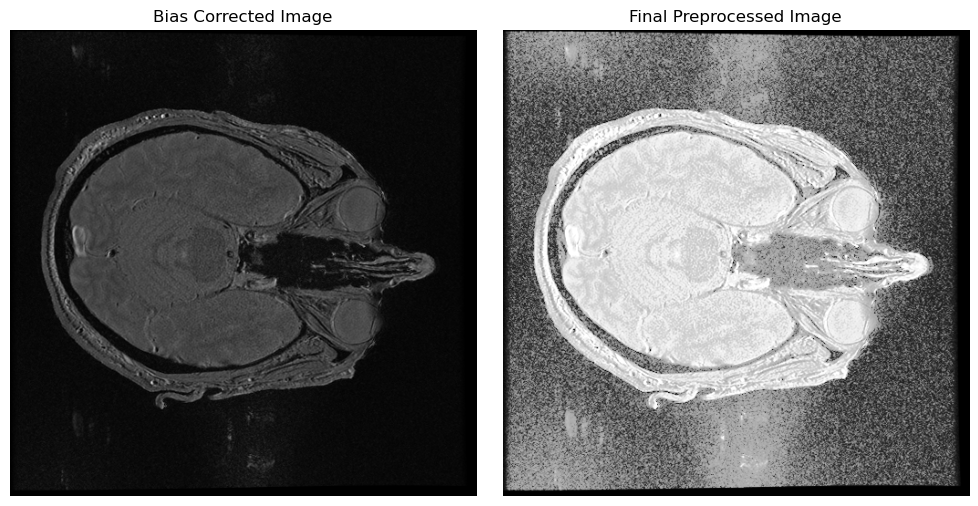

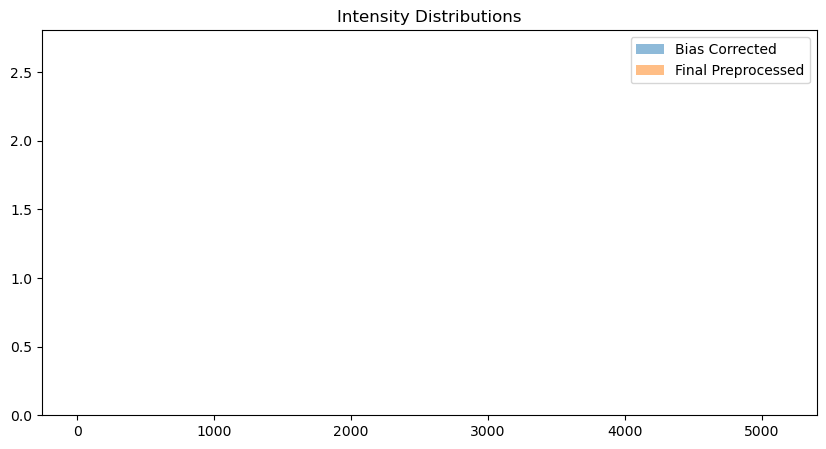


Image Statistics (Central Slice):

Bias Corrected:
Range: [0.000000, 5145.979004]
Mean: 598.861328
Std: 590.701172
Median: 252.972351

Final Preprocessed:
Range: [0.000000, 1.000000]
Mean: 0.539626
Std: 0.284443
Median: 0.541381


In [19]:
import os
import SimpleITK as sitk
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats as scipy_stats

def normalize_to_positive(image_array):
    return image_array - np.min(image_array)

def remove_outliers(image_array, lower_percentile=1, upper_percentile=99):
    lower = np.percentile(image_array, lower_percentile)
    upper = np.percentile(image_array, upper_percentile)
    return np.clip(image_array, lower, upper)

def nyul_standardization(image_array, landmarks_percentiles=[1, 10, 20, 30, 40, 50, 60, 70, 80, 90, 99]):
    landmarks = np.percentile(image_array, landmarks_percentiles)
    standard_scale = np.linspace(0, 1, len(landmarks))
    return np.interp(image_array, landmarks, standard_scale)

def gamma_correction(image_array, gamma=0.8):
    image_norm = (image_array - np.min(image_array)) / (np.max(image_array) - np.min(image_array))
    return np.power(image_norm, gamma)

def preprocess_image(input_path, output_path):
    """Apply full preprocessing pipeline to a single image"""
    print(f"Processing: {os.path.basename(input_path)}")
    
    # Read the bias-corrected image
    image = sitk.ReadImage(input_path)
    image_array = sitk.GetArrayFromImage(image)
    
    # Apply preprocessing steps
    # 1. Intensity normalization
    intensity_norm = normalize_to_positive(image_array)
    
    # 2. Outlier removal
    outlier_removed = remove_outliers(intensity_norm)
    
    # 3. Nyul standardization
    nyul_standardized = nyul_standardization(outlier_removed)
    
    # 4. Gamma correction
    gamma_corrected = gamma_correction(nyul_standardized)
    
    # Convert back to SimpleITK image
    processed_image = sitk.GetImageFromArray(gamma_corrected)
    processed_image.CopyInformation(image)  # Copy original metadata
    
    # Save the processed image
    sitk.WriteImage(processed_image, output_path)
    print(f"Saved to: {output_path}")
    
    return gamma_corrected

# Define directories
base_dir = "/Users/prithvichoudhary/Desktop/practice RA Work/data"
yes_bias_dir = os.path.join(base_dir, "yes_bias_normalised")
no_bias_dir = os.path.join(base_dir, "no_bias_normalised")
pre_yes_dir = os.path.join(base_dir, "pre_yes")
pre_no_dir = os.path.join(base_dir, "pre_no")

# Create output directories
os.makedirs(pre_yes_dir, exist_ok=True)
os.makedirs(pre_no_dir, exist_ok=True)

# Process YES cases
yes_files = [f for f in os.listdir(yes_bias_dir) if f.endswith('.nii.gz') and not f.startswith('intensity_normalised')]
for file in yes_files:
    input_path = os.path.join(yes_bias_dir, file)
    output_path = os.path.join(pre_yes_dir, file)
    preprocess_image(input_path, output_path)

# Process NO cases
no_files = [f for f in os.listdir(no_bias_dir) if f.endswith('.nii.gz') and not f.startswith('intensity_normalised')]
for file in no_files:
    input_path = os.path.join(no_bias_dir, file)
    output_path = os.path.join(pre_no_dir, file)
    preprocess_image(input_path, output_path)

# Visualize the first case as an example
if yes_files:
    first_file = yes_files[0]
    
    # Load all versions of the first image
    bias_path = os.path.join(yes_bias_dir, first_file)
    final_path = os.path.join(pre_yes_dir, first_file)
    
    bias_image = sitk.ReadImage(bias_path)
    final_image = sitk.ReadImage(final_path)
    
    bias_array = sitk.GetArrayFromImage(bias_image)
    final_array = sitk.GetArrayFromImage(final_image)
    
    # Get central slice
    central_slice = bias_array.shape[0] // 2
    
    # Create visualization
    plt.figure(figsize=(10, 5))
    
    plt.subplot(1, 2, 1)
    plt.imshow(np.rot90(bias_array[central_slice]), cmap='gray')
    plt.title('Bias Corrected Image')
    plt.axis('off')
    
    plt.subplot(1, 2, 2)
    plt.imshow(np.rot90(final_array[central_slice]), cmap='gray')
    plt.title('Final Preprocessed Image')
    plt.axis('off')
    
    plt.tight_layout()
    plt.show()
    
    # Display histograms
    plt.figure(figsize=(10, 5))
    plt.hist(bias_array[central_slice].flatten(), bins=50, alpha=0.5, label='Bias Corrected', density=True)
    plt.hist(final_array[central_slice].flatten(), bins=50, alpha=0.5, label='Final Preprocessed', density=True)
    plt.title('Intensity Distributions')
    plt.legend()
    plt.show()
    
    # Print statistics
    print("\nImage Statistics (Central Slice):")
    for title, array in [('Bias Corrected', bias_array[central_slice]), 
                        ('Final Preprocessed', final_array[central_slice])]:
        print(f"\n{title}:")
        print(f"Range: [{np.min(array):.6f}, {np.max(array):.6f}]")
        print(f"Mean: {np.mean(array):.6f}")
        print(f"Std: {np.std(array):.6f}")
        print(f"Median: {np.median(array):.6f}")

In [20]:
#Augmentation 

In [22]:
import os
import SimpleITK as sitk
import numpy as np
from scipy.ndimage import rotate
import random
import shutil

def create_augmented_image(image_array, augmentation_params):
    """
    Create an augmented version of the image while preserving dimensions
    """
    augmented = np.copy(image_array)
    original_shape = augmented.shape
    
    # Rotation
    if 'rotation' in augmentation_params:
        angle = augmentation_params['rotation']
        augmented = rotate(augmented, angle, axes=(1, 2), reshape=False, mode='nearest')
    
    # Flip
    if augmentation_params.get('flip_horizontal', False):
        augmented = np.flip(augmented, axis=2)
    if augmentation_params.get('flip_vertical', False):
        augmented = np.flip(augmented, axis=1)
    
    # Intensity variation
    if 'intensity_shift' in augmentation_params:
        shift = augmentation_params['intensity_shift']
        augmented = augmented + shift
        augmented = np.clip(augmented, 0, 1)
    
    # Ensure original dimensions are preserved
    if augmented.shape != original_shape:
        augmented = zoom(augmented, 
                        (original_shape[0]/augmented.shape[0],
                         original_shape[1]/augmented.shape[1],
                         original_shape[2]/augmented.shape[2]))
    
    return augmented

def augment_dataset(input_dir, output_dir, target_count):
    """
    Augment the dataset to reach target_count number of images
    """
    os.makedirs(output_dir, exist_ok=True)
    
    original_files = [f for f in os.listdir(input_dir) if f.endswith('.nii.gz')]
    current_count = len(original_files)
    
    print(f"Original number of images: {current_count}")
    print(f"Target number of images: {target_count}")
    
    # Copy original files
    for file in original_files:
        shutil.copy2(os.path.join(input_dir, file), 
                    os.path.join(output_dir, file))
    
    num_augmentations_needed = target_count - current_count
    
    if num_augmentations_needed <= 0:
        print("No augmentation needed")
        return
    
    augmentations_per_image = int(np.ceil(num_augmentations_needed / current_count))
    print(f"Creating {augmentations_per_image} augmentations per original image...")
    
    # Modified augmentation parameters
    aug_params_ranges = {
        'rotation': (-15, 15),        # Reduced rotation range
        'intensity_shift': (-0.1, 0.1)
    }
    
    augmentation_count = 0
    
    for file in original_files:
        image_path = os.path.join(input_dir, file)
        original_image = sitk.ReadImage(image_path)
        original_array = sitk.GetArrayFromImage(original_image)
        
        # Normalize to [0,1]
        original_array = (original_array - np.min(original_array)) / (np.max(original_array) - np.min(original_array))
        
        for i in range(augmentations_per_image):
            if augmentation_count >= num_augmentations_needed:
                break
                
            # Generate random augmentation parameters
            aug_params = {
                'rotation': random.uniform(*aug_params_ranges['rotation']),
                'intensity_shift': random.uniform(*aug_params_ranges['intensity_shift']),
                'flip_horizontal': random.choice([True, False]),
                'flip_vertical': random.choice([True, False])
            }
            
            try:
                # Create augmented image
                augmented_array = create_augmented_image(original_array, aug_params)
                
                # Verify dimensions match
                assert augmented_array.shape == original_array.shape, "Dimension mismatch"
                
                # Create new filename
                base_name = os.path.splitext(os.path.splitext(file)[0])[0]
                new_filename = f"{base_name}_aug_{i+1}.nii.gz"
                
                # Convert back to SimpleITK image
                augmented_image = sitk.GetImageFromArray(augmented_array)
                augmented_image.CopyInformation(original_image)
                
                # Save augmented image
                sitk.WriteImage(augmented_image, os.path.join(output_dir, new_filename))
                augmentation_count += 1
                
                if augmentation_count % 10 == 0:
                    print(f"Created {augmentation_count} augmented images...")
                    
            except Exception as e:
                print(f"Error processing {file}: {str(e)}")
                continue
    
    final_count = len([f for f in os.listdir(output_dir) if f.endswith('.nii.gz')])
    print(f"Augmentation complete. Final dataset size: {final_count}")

# Define directories
base_dir = "/Users/prithvichoudhary/Desktop/practice RA Work/data"
pre_no_dir = os.path.join(base_dir, "pre_no")
augmented_dir = os.path.join(base_dir, "yes_augmented")

# Set target count
target_count = 950

# Run augmentation
augment_dataset(pre_no_dir, augmented_dir, target_count)

# Verify results
def print_dataset_info(directory):
    files = [f for f in os.listdir(directory) if f.endswith('.nii.gz')]
    print(f"\nDirectory: {directory}")
    print(f"Number of images: {len(files)}")
    
    if files:
        sample_image = sitk.ReadImage(os.path.join(directory, files[0]))
        sample_array = sitk.GetArrayFromImage(sample_image)
        print(f"Image shape: {sample_array.shape}")
        print(f"Intensity range: [{np.min(sample_array):.3f}, {np.max(sample_array):.3f}]")

print("\nDataset Information:")
print_dataset_info(pre_no_dir)
print_dataset_info(augmented_dir)

Original number of images: 206
Target number of images: 950
Creating 4 augmentations per original image...
Created 10 augmented images...
Created 20 augmented images...
Created 30 augmented images...
Created 40 augmented images...
Created 50 augmented images...
Created 60 augmented images...
Created 70 augmented images...
Created 80 augmented images...
Created 90 augmented images...
Created 100 augmented images...
Created 110 augmented images...
Created 120 augmented images...
Created 130 augmented images...
Created 140 augmented images...
Created 150 augmented images...
Created 160 augmented images...
Created 170 augmented images...
Created 180 augmented images...
Created 190 augmented images...
Created 200 augmented images...
Created 210 augmented images...
Created 220 augmented images...
Created 230 augmented images...
Created 240 augmented images...
Created 250 augmented images...
Created 260 augmented images...
Created 270 augmented images...
Created 280 augmented images...
Create

In [24]:
pip install torch torchvision


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 16.4 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [26]:
import os
import SimpleITK as sitk
import numpy as np
from PIL import Image
import torchvision.transforms as transforms

def prepare_slice_for_resnet(slice_array):
    """Prepare a single slice for ResNet-50"""
    # Normalize to [0, 255]
    slice_normalized = ((slice_array - np.min(slice_array)) / 
                       (np.max(slice_array) - np.min(slice_array)) * 255).astype(np.uint8)
    
    # Convert to PIL Image
    img = Image.fromarray(slice_normalized)
    
    # ResNet-50 preprocessing
    transform = transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.Grayscale(3),  # Convert to 3 channels
    ])
    
    return transform(img)

def process_and_save_images(input_dir, output_dir):
    """Process all slices and save as JPEG images"""
    os.makedirs(output_dir, exist_ok=True)
    
    # Get all NIFTI files
    nifti_files = [f for f in os.listdir(input_dir) if f.endswith('.nii.gz')]
    total_files = len(nifti_files)
    
    print(f"Processing {total_files} files from {input_dir}")
    
    image_count = 0
    for idx, file in enumerate(nifti_files, 1):
        try:
            # Read image
            input_path = os.path.join(input_dir, file)
            image = sitk.ReadImage(input_path)
            image_array = sitk.GetArrayFromImage(image)
            
            # Process each slice
            for slice_idx in range(image_array.shape[0]):
                # Get and process slice
                slice_array = image_array[slice_idx]
                processed_img = prepare_slice_for_resnet(slice_array)
                
                # Create filename: patientID_sliceNumber.jpg
                base_name = os.path.splitext(os.path.splitext(file)[0])[0]
                output_path = os.path.join(output_dir, f"{base_name}_slice{slice_idx}.jpg")
                
                # Save as JPEG
                processed_img.save(output_path, "JPEG", quality=95)
                image_count += 1
            
            if idx % 10 == 0:
                print(f"Processed {idx}/{total_files} files")
                
        except Exception as e:
            print(f"Error processing {file}: {str(e)}")
    
    print(f"Total images created: {image_count}")
    return image_count

# Define directories
base_dir = "/Users/prithvichoudhary/Desktop/practice RA Work/data"
pre_yes_dir = os.path.join(base_dir, "pre_yes")
augmented_dir = os.path.join(base_dir, "yes_augmented")
final_yes_dir = os.path.join(base_dir, "final_yes")
final_no_dir = os.path.join(base_dir, "final_no")

# Process both datasets
print("\nProcessing PD patients...")
yes_count = process_and_save_images(pre_yes_dir, final_yes_dir)

print("\nProcessing control subjects...")
no_count = process_and_save_images(augmented_dir, final_no_dir)

# Print summary
print("\nProcessing Complete!")
print(f"PD images created: {yes_count}")
print(f"Control images created: {no_count}")

# Verify image dimensions
def verify_images(directory):
    """Check dimensions of saved images"""
    images = [f for f in os.listdir(directory) if f.endswith('.jpg')]
    if images:
        sample_img = Image.open(os.path.join(directory, images[0]))
        print(f"\nDirectory: {directory}")
        print(f"Number of images: {len(images)}")
        print(f"Image dimensions: {sample_img.size}")
        print(f"Image mode: {sample_img.mode}")

verify_images(final_yes_dir)
verify_images(final_no_dir)


Processing PD patients...
Processing 1158 files from /Users/prithvichoudhary/Desktop/practice RA Work/data/pre_yes
Processed 10/1158 files
Processed 20/1158 files
Processed 30/1158 files
Processed 40/1158 files
Processed 50/1158 files
Processed 60/1158 files
Processed 70/1158 files
Processed 80/1158 files
Processed 90/1158 files
Processed 100/1158 files
Processed 110/1158 files
Processed 120/1158 files
Processed 130/1158 files
Processed 140/1158 files
Processed 150/1158 files
Processed 160/1158 files
Processed 170/1158 files
Processed 180/1158 files
Processed 190/1158 files
Processed 200/1158 files
Processed 210/1158 files
Processed 220/1158 files
Processed 230/1158 files
Processed 240/1158 files
Processed 250/1158 files
Processed 260/1158 files
Processed 270/1158 files
Processed 280/1158 files
Processed 290/1158 files
Processed 300/1158 files
Processed 310/1158 files
Processed 320/1158 files
Processed 330/1158 files
Processed 340/1158 files
Processed 350/1158 files
Processed 360/1158

In [ ]:
#data_split/
#    ├── train/
#    │   ├── yes/
#    │   └── no/
#    ├── val/
#    │   ├── yes/
#    │   └── no/
#    └── test/
#        ├── yes/
#        └── no/

In [27]:
import os
import shutil
import random
from sklearn.model_selection import train_test_split

def split_data(source_yes_dir, source_no_dir, split_base_dir):
    """
    Split data into train, validation, and test sets with 70-15-15 ratio
    """
    # Create directory structure
    for split in ['train', 'val', 'test']:
        for label in ['yes', 'no']:
            os.makedirs(os.path.join(split_base_dir, split, label), exist_ok=True)
    
    # Function to split and copy files
    def process_files(source_dir, label):
        files = [f for f in os.listdir(source_dir) if f.endswith('.jpg')]
        print(f"\nProcessing {label} files:")
        print(f"Total files found: {len(files)}")
        
        # First split: 70% train, 30% remaining
        train_files, temp_files = train_test_split(files, train_size=0.7, random_state=42)
        
        # Second split: Split remaining 30% into 15-15
        val_files, test_files = train_test_split(temp_files, test_size=0.5, random_state=42)
        
        # Copy files to respective directories
        for file in train_files:
            shutil.copy2(
                os.path.join(source_dir, file),
                os.path.join(split_base_dir, 'train', label, file)
            )
        
        for file in val_files:
            shutil.copy2(
                os.path.join(source_dir, file),
                os.path.join(split_base_dir, 'val', label, file)
            )
        
        for file in test_files:
            shutil.copy2(
                os.path.join(source_dir, file),
                os.path.join(split_base_dir, 'test', label, file)
            )
        
        print(f"Train files: {len(train_files)} ({len(train_files)/len(files)*100:.1f}%)")
        print(f"Validation files: {len(val_files)} ({len(val_files)/len(files)*100:.1f}%)")
        print(f"Test files: {len(test_files)} ({len(test_files)/len(files)*100:.1f}%)")
        
        return len(train_files), len(val_files), len(test_files)

    # Process both yes and no directories
    print("Splitting PD (yes) data...")
    yes_counts = process_files(source_yes_dir, 'yes')
    
    print("\nSplitting Healthy (no) data...")
    no_counts = process_files(source_no_dir, 'no')
    
    # Print final statistics
    print("\nFinal Dataset Statistics:")
    print("\nTraining Set:")
    print(f"PD: {yes_counts[0]} images")
    print(f"Healthy: {no_counts[0]} images")
    
    print("\nValidation Set:")
    print(f"PD: {yes_counts[1]} images")
    print(f"Healthy: {no_counts[1]} images")
    
    print("\nTest Set:")
    print(f"PD: {yes_counts[2]} images")
    print(f"Healthy: {no_counts[2]} images")

# Define directories
base_dir = "/Users/prithvichoudhary/Desktop/practice RA Work/data"
final_yes_dir = os.path.join(base_dir, "final_yes")
final_no_dir = os.path.join(base_dir, "final_no")
split_base_dir = os.path.join(base_dir, "data_split")

# Perform the split
split_data(final_yes_dir, final_no_dir, split_base_dir)

# Verify the split
def verify_split(split_dir):
    """Verify the number of images in each split"""
    for split in ['train', 'val', 'test']:
        for label in ['yes', 'no']:
            path = os.path.join(split_dir, split, label)
            num_images = len([f for f in os.listdir(path) if f.endswith('.jpg')])
            print(f"{split}/{label}: {num_images} images")

print("\nVerifying directory structure and file counts:")
verify_split(split_base_dir)

Splitting PD (yes) data...

Processing yes files:
Total files found: 18528
Train files: 12969 (70.0%)
Validation files: 2779 (15.0%)
Test files: 2780 (15.0%)

Splitting Healthy (no) data...

Processing no files:
Total files found: 15200
Train files: 10640 (70.0%)
Validation files: 2280 (15.0%)
Test files: 2280 (15.0%)

Final Dataset Statistics:

Training Set:
PD: 12969 images
Healthy: 10640 images

Validation Set:
PD: 2779 images
Healthy: 2280 images

Test Set:
PD: 2780 images
Healthy: 2280 images

Verifying directory structure and file counts:
train/yes: 12969 images
train/no: 10640 images
val/yes: 2779 images
val/no: 2280 images
test/yes: 2780 images
test/no: 2280 images


Using device: cpu


/Users/prithvichoudhary/fsl/lib/python3.11/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/Users/prithvichoudhary/fsl/lib/python3.11/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /Users/prithvichoudhary/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth
100%|██████████████████████████████████████| 97.8M/97.8M [00:02<00:00, 40.3MB/s]


Epoch 1/10
----------


train - Epoch 1/10: 100%|████████| 738/738 [1:18:11<00:00,  6.36s/it, loss=1.03]


train Loss: 0.2707 Acc: 0.8818


val - Epoch 1/10: 100%|█████████| 159/159 [09:41<00:00,  3.66s/it, loss=0.00606]


val Loss: 0.1462 Acc: 0.9360

Epoch 2/10
----------


train - Epoch 2/10: 100%|███████| 738/738 [1:15:38<00:00,  6.15s/it, loss=0.047]


train Loss: 0.1413 Acc: 0.9460


val - Epoch 2/10: 100%|████████| 159/159 [09:40<00:00,  3.65s/it, loss=0.000378]


val Loss: 0.0812 Acc: 0.9703

Epoch 3/10
----------


train - Epoch 3/10: 100%|██████| 738/738 [1:16:04<00:00,  6.18s/it, loss=0.0128]


train Loss: 0.0913 Acc: 0.9651


val - Epoch 3/10: 100%|█████████| 159/159 [09:32<00:00,  3.60s/it, loss=1.62e-5]


val Loss: 0.0698 Acc: 0.9741

Epoch 4/10
----------


train - Epoch 4/10: 100%|██████| 738/738 [1:14:47<00:00,  6.08s/it, loss=0.0152]


train Loss: 0.0643 Acc: 0.9755


val - Epoch 4/10: 100%|█████████| 159/159 [09:36<00:00,  3.63s/it, loss=9.14e-6]


val Loss: 0.0476 Acc: 0.9810

Epoch 5/10
----------


train - Epoch 5/10: 100%|███████| 738/738 [1:13:09<00:00,  5.95s/it, loss=0.119]


train Loss: 0.0535 Acc: 0.9806


val - Epoch 5/10: 100%|█████████| 159/159 [09:59<00:00,  3.77s/it, loss=9.77e-5]


val Loss: 0.0431 Acc: 0.9826

Epoch 6/10
----------


train - Epoch 6/10: 100%|█████| 738/738 [1:16:46<00:00,  6.24s/it, loss=0.00269]


train Loss: 0.0490 Acc: 0.9818


val - Epoch 6/10: 100%|█████████| 159/159 [09:12<00:00,  3.47s/it, loss=7.95e-8]


val Loss: 0.0379 Acc: 0.9858

Epoch 7/10
----------


train - Epoch 7/10: 100%|█████| 738/738 [1:14:31<00:00,  6.06s/it, loss=0.00789]


train Loss: 0.0382 Acc: 0.9862


val - Epoch 7/10: 100%|███████████████| 159/159 [09:54<00:00,  3.74s/it, loss=0]


val Loss: 0.3070 Acc: 0.9205

Epoch 8/10
----------


train - Epoch 8/10: 100%|█████| 738/738 [1:23:56<00:00,  6.82s/it, loss=0.00168]


train Loss: 0.0334 Acc: 0.9880


val - Epoch 8/10: 100%|████████████| 159/159 [09:43<00:00,  3.67s/it, loss=1.31]


val Loss: 0.8072 Acc: 0.7905

Epoch 9/10
----------


train - Epoch 9/10: 100%|█████| 738/738 [1:14:03<00:00,  6.02s/it, loss=0.00417]


train Loss: 0.0372 Acc: 0.9866


val - Epoch 9/10: 100%|███████████████| 159/159 [09:20<00:00,  3.52s/it, loss=0]


val Loss: 0.0108 Acc: 0.9964

Epoch 10/10
----------


train - Epoch 10/10: 100%|████| 738/738 [1:19:10<00:00,  6.44s/it, loss=0.00104]


train Loss: 0.0259 Acc: 0.9900


val - Epoch 10/10: 100%|██████████████| 159/159 [10:00<00:00,  3.78s/it, loss=0]


val Loss: 0.0283 Acc: 0.9895



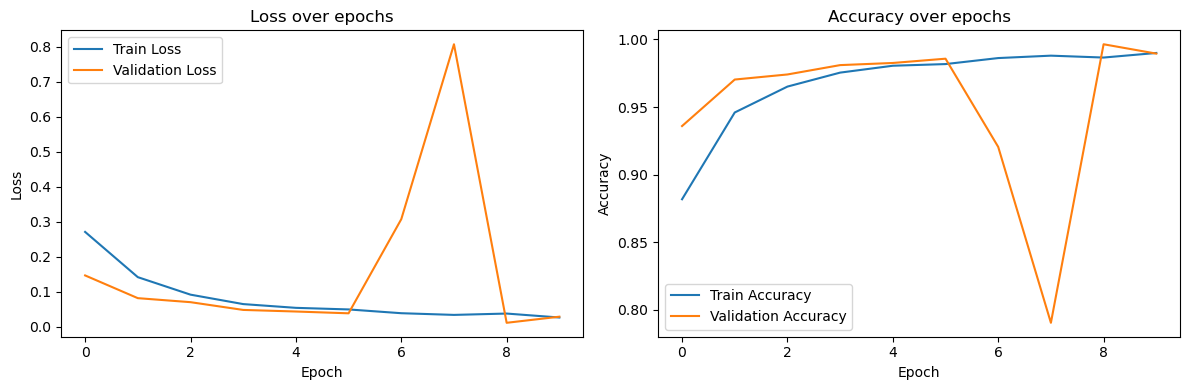

Evaluating: 100%|█████████████████████████████| 159/159 [09:48<00:00,  3.70s/it]


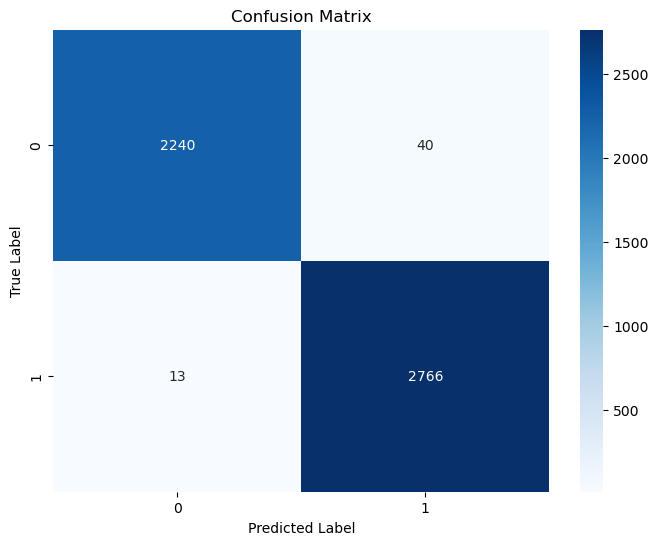


Classification Report:
              precision    recall  f1-score   support

     Healthy       0.99      0.98      0.99      2280
          PD       0.99      1.00      0.99      2779

    accuracy                           0.99      5059
   macro avg       0.99      0.99      0.99      5059
weighted avg       0.99      0.99      0.99      5059



In [28]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import models, transforms, datasets
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
from tqdm import tqdm

# Set device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# Data directories
data_dir = "/Users/prithvichoudhary/Desktop/practice RA Work/data/data_split"

# Data transforms
data_transforms = {
    'train': transforms.Compose([
        transforms.RandomHorizontalFlip(),
        transforms.RandomRotation(10),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
    'val': transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ])
}

# Load datasets
image_datasets = {
    'train': datasets.ImageFolder(f"{data_dir}/train", data_transforms['train']),
    'val': datasets.ImageFolder(f"{data_dir}/val", data_transforms['val'])
}

# Create dataloaders
dataloaders = {
    'train': DataLoader(image_datasets['train'], batch_size=32, shuffle=True, num_workers=4),
    'val': DataLoader(image_datasets['val'], batch_size=32, shuffle=False, num_workers=4)
}

# Initialize model
model = models.resnet50(pretrained=True)
num_ftrs = model.fc.in_features
model.fc = nn.Linear(num_ftrs, 2)  # 2 classes: PD and Healthy
model = model.to(device)

# Loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', patience=2)

# Training metrics storage
train_losses = []
val_losses = []
train_accuracies = []
val_accuracies = []

def train_model(model, criterion, optimizer, scheduler, num_epochs=10):
    best_acc = 0.0
    
    for epoch in range(num_epochs):
        print(f'Epoch {epoch+1}/{num_epochs}')
        print('-' * 10)
        
        # Each epoch has a training and validation phase
        for phase in ['train', 'val']:
            if phase == 'train':
                model.train()
            else:
                model.eval()
                
            running_loss = 0.0
            running_corrects = 0
            
            # Progress bar
            pbar = tqdm(dataloaders[phase], desc=f'{phase} - Epoch {epoch+1}/{num_epochs}')
            
            # Iterate over data
            for inputs, labels in pbar:
                inputs = inputs.to(device)
                labels = labels.to(device)
                
                optimizer.zero_grad()
                
                with torch.set_grad_enabled(phase == 'train'):
                    outputs = model(inputs)
                    _, preds = torch.max(outputs, 1)
                    loss = criterion(outputs, labels)
                    
                    if phase == 'train':
                        loss.backward()
                        optimizer.step()
                
                running_loss += loss.item() * inputs.size(0)
                running_corrects += torch.sum(preds == labels.data)
                
                # Update progress bar
                pbar.set_postfix({'loss': loss.item()})
            
            epoch_loss = running_loss / len(image_datasets[phase])
            epoch_acc = running_corrects.double() / len(image_datasets[phase])
            
            print(f'{phase} Loss: {epoch_loss:.4f} Acc: {epoch_acc:.4f}')
            
            # Store metrics
            if phase == 'train':
                train_losses.append(epoch_loss)
                train_accuracies.append(epoch_acc.cpu())
            else:
                val_losses.append(epoch_loss)
                val_accuracies.append(epoch_acc.cpu())
                scheduler.step(epoch_loss)
            
            # Save best model
            if phase == 'val' and epoch_acc > best_acc:
                best_acc = epoch_acc
                torch.save(model.state_dict(), 'best_model.pth')
        
        print()
    
    return model

# Train the model
model = train_model(model, criterion, optimizer, scheduler, num_epochs=10)

# Plot training curves
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Train Loss')
plt.plot(val_losses, label='Validation Loss')
plt.title('Loss over epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(train_accuracies, label='Train Accuracy')
plt.plot(val_accuracies, label='Validation Accuracy')
plt.title('Accuracy over epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

# Confusion Matrix and Classification Report
def evaluate_model(model, dataloader):
    model.eval()
    all_preds = []
    all_labels = []
    
    with torch.no_grad():
        for inputs, labels in tqdm(dataloader, desc='Evaluating'):
            inputs = inputs.to(device)
            labels = labels.to(device)
            
            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)
            
            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())
    
    return all_preds, all_labels

# Evaluate on validation set
val_preds, val_labels = evaluate_model(model, dataloaders['val'])

# Create confusion matrix
cm = confusion_matrix(val_labels, val_preds)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

# Print classification report
print("\nClassification Report:")
print(classification_report(val_labels, val_preds, 
                          target_names=['Healthy', 'PD']))

# Save model and metrics
torch.save({
    'model_state_dict': model.state_dict(),
    'optimizer_state_dict': optimizer.state_dict(),
    'train_losses': train_losses,
    'val_losses': val_losses,
    'train_accuracies': train_accuracies,
    'val_accuracies': val_accuracies,
}, 'model_training_results.pth')

In [ ]:
Testing Results 

In [33]:
# Add Test Data Transform (same as validation)
test_transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

# Load Test Dataset
test_dataset = datasets.ImageFolder(f"/Users/prithvichoudhary/Desktop/practice RA Work/data/data_split/test", transform=test_transform)

# Create Test DataLoader
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False, num_workers=4)


Evaluating: 100%|█████████████████████████████| 159/159 [08:20<00:00,  3.15s/it]


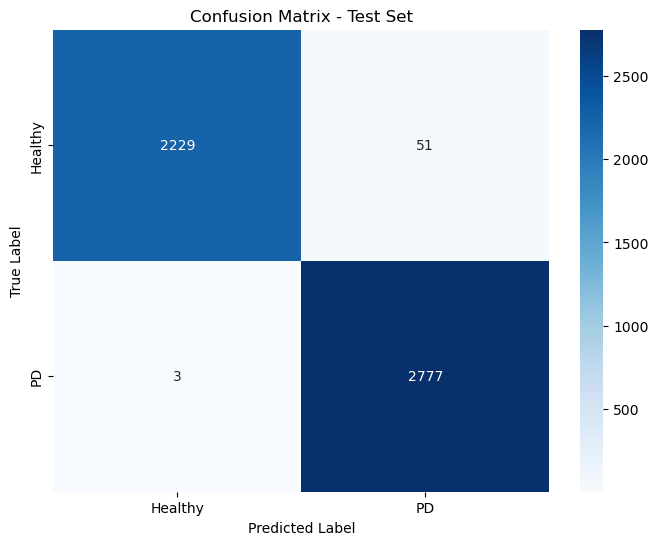


Test Set Classification Report:
              precision    recall  f1-score   support

     Healthy       1.00      0.98      0.99      2280
          PD       0.98      1.00      0.99      2780

    accuracy                           0.99      5060
   macro avg       0.99      0.99      0.99      5060
weighted avg       0.99      0.99      0.99      5060


Test Set Accuracy: 0.9893


In [34]:
# Evaluate on the test set
test_preds, test_labels = evaluate_model(model, test_loader)

# Create confusion matrix for test set
cm = confusion_matrix(test_labels, test_preds)

# Plot confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Healthy', 'PD'], yticklabels=['Healthy', 'PD'])
plt.title('Confusion Matrix - Test Set')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

# Print Classification Report for test set
print("\nTest Set Classification Report:")
print(classification_report(test_labels, test_preds, target_names=['Healthy', 'PD']))

# Calculate and display accuracy for the test set
test_accuracy = accuracy_score(test_labels, test_preds)
print(f"\nTest Set Accuracy: {test_accuracy:.4f}")


In [ ]:
#Info of model

import torch
import torch.nn as nn
from torchvision import models
from torchinfo import summary  # Use torchinfo instead of torchsummary

# Load your model
model = models.resnet50(pretrained=False)
num_ftrs = model.fc.in_features
model.fc = nn.Linear(num_ftrs, 2)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)

# Load the best model weights
model.load_state_dict(torch.load('best_model.pth', map_location=device))

# Get model summary
summary(model, input_size=(1, 3, 224, 224))

In [39]:
pip install torchinfo

Note: you may need to restart the kernel to use updated packages.


In [40]:
def print_model_summary(model):
    print("Model Structure:")
    print("=" * 50)
    
    def count_parameters(model):
        return sum(p.numel() for p in model.parameters() if p.requires_grad)
    
    # Print layers
    for idx, (name, module) in enumerate(model.named_children()):
        print(f"\nLayer {idx}: {name}")
        print(f"Type: {type(module).__name__}")
        num_params = sum(p.numel() for p in module.parameters())
        print(f"Parameters: {num_params:,}")
        
        # Print sublayers if any
        if len(list(module.children())) > 0:
            for sub_idx, (sub_name, sub_module) in enumerate(module.named_children()):
                print(f"  Sublayer {sub_idx}: {sub_name}")
                print(f"  Type: {type(sub_module).__name__}")
                sub_params = sum(p.numel() for p in sub_module.parameters())
                print(f"  Parameters: {sub_params:,}")
    
    print("\n" + "=" * 50)
    print(f"Total Trainable Parameters: {count_parameters(model):,}")
    print(f"Total Parameters: {sum(p.numel() for p in model.parameters()):,}")
    
    # Calculate model size
    param_size = 0
    for param in model.parameters():
        param_size += param.nelement() * param.element_size()
    buffer_size = 0
    for buffer in model.buffers():
        buffer_size += buffer.nelement() * buffer.element_size()
    
    size_all_mb = (param_size + buffer_size) / 1024**2
    print(f"Model Size: {size_all_mb:.2f} MB")

# Use the function
print_model_summary(model)

Model Structure:

Layer 0: conv1
Type: Conv2d
Parameters: 9,408

Layer 1: bn1
Type: BatchNorm2d
Parameters: 128

Layer 2: relu
Type: ReLU
Parameters: 0

Layer 3: maxpool
Type: MaxPool2d
Parameters: 0

Layer 4: layer1
Type: Sequential
Parameters: 215,808
  Sublayer 0: 0
  Type: Bottleneck
  Parameters: 75,008
  Sublayer 1: 1
  Type: Bottleneck
  Parameters: 70,400
  Sublayer 2: 2
  Type: Bottleneck
  Parameters: 70,400

Layer 5: layer2
Type: Sequential
Parameters: 1,219,584
  Sublayer 0: 0
  Type: Bottleneck
  Parameters: 379,392
  Sublayer 1: 1
  Type: Bottleneck
  Parameters: 280,064
  Sublayer 2: 2
  Type: Bottleneck
  Parameters: 280,064
  Sublayer 3: 3
  Type: Bottleneck
  Parameters: 280,064

Layer 6: layer3
Type: Sequential
Parameters: 7,098,368
  Sublayer 0: 0
  Type: Bottleneck
  Parameters: 1,512,448
  Sublayer 1: 1
  Type: Bottleneck
  Parameters: 1,117,184
  Sublayer 2: 2
  Type: Bottleneck
  Parameters: 1,117,184
  Sublayer 3: 3
  Type: Bottleneck
  Parameters: 1,117,184
  